# Proyek Analisis Data: [ Bike-Sharing-Dataset ]
- **Nama:** [ Muhamad Fahmi ]
- **Email:** [ 	mc246d5y2423@student.devacademy.id ]
- **ID Dicoding:** [ muhamad_fahmii ]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana perbandingan jumlah peminjam untuk setiap harinya ?
- Pertanyaan 2 : Bagaimana perbandingan jumlah pengunjung untuk setiap weathersit?
- pertanyaan 3 : Bagaimana perbandingan jumlah pengunjung untuk setiap season?

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Semua Packages/Library yang Digunakan

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [52]:
# Read the CSV file from the URL
raw_df = pd.read_csv('/content/drive/MyDrive/dataset/day.csv')

# Display the first few rows of the DataFrame
raw_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.34,0.36,0.81,0.16,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.36,0.35,0.70,0.25,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.20,0.19,0.44,0.25,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.20,0.21,0.59,0.16,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.23,0.23,0.44,0.19,82,1518,1600


**Insight:**
- Menampilkan lima baris pertama dari day_df

### Assessing Data

Menilai Tabel data

In [53]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [54]:
print("Jumlah duplikasi: ", raw_df.duplicated().sum())

Jumlah duplikasi:  0


In [55]:
raw_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00
mean,366.00,2.50,0.50,6.52,0.03,3.00,0.68,1.40,0.50,0.47,0.63,0.19,848.18,3656.17,4504.35
std,211.17,1.11,0.50,3.45,0.17,2.00,0.47,0.54,0.18,0.16,0.14,0.08,686.62,1560.26,1937.21
min,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.06,0.08,0.00,0.02,2.00,20.00,22.00
25%,183.50,2.00,0.00,4.00,0.00,1.00,0.00,1.00,0.34,0.34,0.52,0.13,315.50,2497.00,3152.00
50%,366.00,3.00,1.00,7.00,0.00,3.00,1.00,1.00,0.50,0.49,0.63,0.18,713.00,3662.00,4548.00
75%,548.50,3.00,1.00,10.00,0.00,5.00,1.00,2.00,0.66,0.61,0.73,0.23,1096.00,4776.50,5956.00
max,731.00,4.00,1.00,12.00,1.00,6.00,1.00,3.00,0.86,0.84,0.97,0.51,3410.00,6946.00,8714.00


**Insight:**
- Tidak ada missing value
- Tidak ada duplikasi data
- Tidak ada inaccurate value
- Terdapat kesalahan tipe data pada kolom dtday

### Cleaning Data

mengecek duplikasi

In [56]:
raw_df.duplicated().sum()

0

mengecek missing value

In [57]:
raw_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


merubah tipe data dteday

In [58]:
raw_df['dteday'] = pd.to_datetime(raw_df['dteday'])

**Insight:**
- Tipedata dteday berhasil diubah dari tipe data object menjadi datetime

## Exploratory Data Analysis (EDA)

In [59]:
raw_df.groupby(by=["holiday", "weekday"]).agg({
    "temp": "sum",
    "hum": "sum",
    "windspeed":"sum",
    "cnt": [  "mean","min","max"]
})

temp   hum windspeed     cnt            
                  sum   sum       sum    mean   min   max
holiday weekday                                          
0       0       50.78 65.90     19.80 4228.83   605  8227
        1       44.61 57.56     17.03 4398.87    22  7525
        2       52.15 66.02     19.78 4544.62   683  7767
        3       51.69 66.58     19.39 4520.83   441  8173
        4       51.74 62.26     19.71 4720.34   431  7804
        5       50.77 62.71     18.84 4718.59  1167  8362
        6       50.61 65.05     20.64 4550.54   627  8714
1       1        7.20  9.39      2.99 3973.67  1000  6370
        2        0.29  0.73      0.17 1013.00  1013  1013
        3        0.79  0.54      0.13 7403.00  7403  7403
        4        0.71  1.13      0.22 1960.00  1495  2425
        5        0.77  1.12      0.54 3247.00  3126  3368

#Explore data raw_df berdasarkan hari

In [60]:
pivot_holiday = raw_df.groupby(by=["holiday"]).agg({
    "cnt": "sum"
}).reset_index()
pivot_weekday = raw_df.groupby(by=["weekday"]).agg({
    "cnt":"sum"
}).reset_index()
pivot_workingday = raw_df.groupby(by=["workingday"]).agg({
    "cnt": "sum"
}).reset_index()
pivot_holiday

,holiday,cnt
0,0,3214244
1,1,78435


Menampilkan pivot tabel

In [61]:
pd.options.display.float_format = '{:.0f}'.format
print("Rata-rata jumlah peminjaman sepeda terhadap hari libur :")
print(pivot_holiday.to_string(index=False))
print("\n===============================================\n")
print("Rata-rata jumlah peminjaman sepeda terhadap hari :")
print(pivot_weekday.to_string(index=False))
print("\n===============================================\n")
print("Rata-rata jumlah peminjaman sepeda terhadap hari kerja :")
print(pivot_workingday.to_string(index=False))

Rata-rata jumlah peminjaman sepeda terhadap hari libur :
 holiday     cnt
       0 3214244
       1   78435


Rata-rata jumlah peminjaman sepeda terhadap hari :
 weekday    cnt
       0 444027
       1 455503
       2 469109
       3 473048
       4 485395
       5 487790
       6 477807


Rata-rata jumlah peminjaman sepeda terhadap hari kerja :
 workingday     cnt
          0 1000269
          1 2292410


#Explore data raw_df berdasarkan season

In [62]:
raw_df['season'] = raw_df['season'].map({1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'})

In [63]:
pivot_season = raw_df.groupby(by=["season"]).agg({
    "cnt": "sum"
}).reset_index()

# Menampilkan pivot tabel
pd.options.display.float_format = '{:.0f}'.format
print("Rata-rata jumlah peminjaman sepeda terhadap hari libur :")
print(pivot_season.to_string(index=False))

Rata-rata jumlah peminjaman sepeda terhadap hari libur :
season     cnt
Dingin  841613
 Gugur 1061129
 Panas  918589
  Semi  471348


#Explore data raw_df berdasarkan weathersit

In [ ]:
raw_df['weathersit'] =raw_df['weathersit'].map({1: 'Cerah', 2: 'Berkabut', 3: 'Hujan Ringan', 4: 'Hujan Lebat'})

In [64]:
pivot_weathersit = raw_df.groupby(by=["weathersit"]).agg({
    "cnt": "sum"
}).reset_index()

# Menampilkan pivot tabel
pd.options.display.float_format = '{:.2f}'.format
print("Rata-rata jumlah peminjaman sepeda terhadap hari libur :")
print(pivot_weathersit.to_string(index=False))

Rata-rata jumlah peminjaman sepeda terhadap hari libur :
 weathersit     cnt
          1 2257952
          2  996858
          3   37869


#Explore data raw_df berdasarkan humidity

In [65]:
hum_df = raw_df[['hum','cnt']]
hum_df

,hum,cnt
0,0.81,985
1,0.70,801
2,0.44,1349
3,0.59,1562
4,0.44,1600
...,...,...
726,0.65,2114
727,0.59,3095
728,0.75,1341
729,0.48,1796


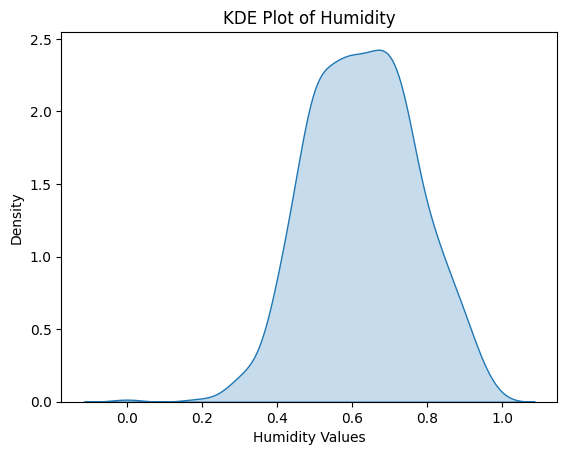

In [66]:
sns.kdeplot(data=hum_df['hum'], fill=True)
plt.title('KDE Plot of Humidity')
plt.xlabel('Humidity Values')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Bagaimana perbandingan jumlah peminjam untuk setiap harinya?

In [67]:
day_df= raw_df.groupby(by=["weekday"]).agg({
    "cnt": "sum"
}).reset_index()
day_df

,weekday,cnt
0,0,444027
1,1,455503
2,2,469109
3,3,473048
4,4,485395
5,5,487790
6,6,477807


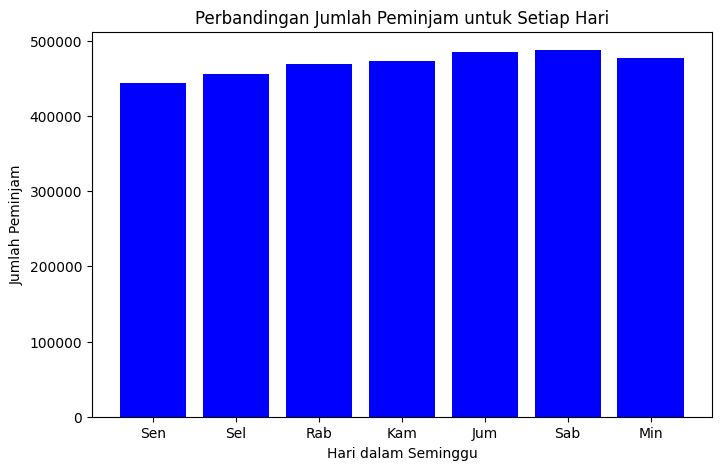

In [68]:
pivot_weekday = raw_df.groupby('weekday').agg({'cnt': 'sum'}).reset_index()
plt.figure(figsize=(8, 5))
plt.bar(pivot_weekday['weekday'], pivot_weekday['cnt'], color='blue')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Peminjam')
plt.title('Perbandingan Jumlah Peminjam untuk Setiap Hari')
plt.xticks(ticks=range(7), labels=['Sen', 'Sel', 'Rab', 'Kam', 'Jum', 'Sab', 'Min'])
plt.show()

### Pertanyaan 2 : Bagaimana perbandingan jumlah pengunjung untuk setiap weathersit?

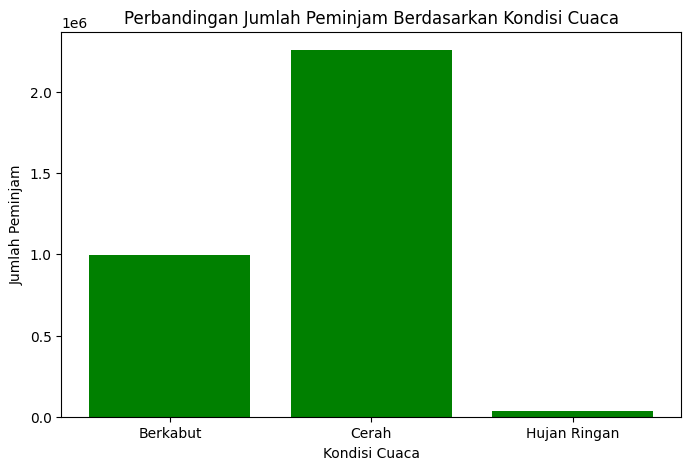

In [69]:
weather_mapping = {1: 'Cerah', 2: 'Berkabut', 3: 'Hujan Ringan', 4: 'Hujan Lebat'}
raw_df['weathersit'] = raw_df['weathersit'].map(weather_mapping)
pivot_weathersit = raw_df.groupby('weathersit').agg({'cnt': 'sum'}).reset_index()
plt.figure(figsize=(8, 5))
plt.bar(pivot_weathersit['weathersit'], pivot_weathersit['cnt'], color='green')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjam')
plt.title('Perbandingan Jumlah Peminjam Berdasarkan Kondisi Cuaca')
plt.show()

### Pertanyaan 3 : Bagaimana perbandingan jumlah pengunjung untuk setiap season?

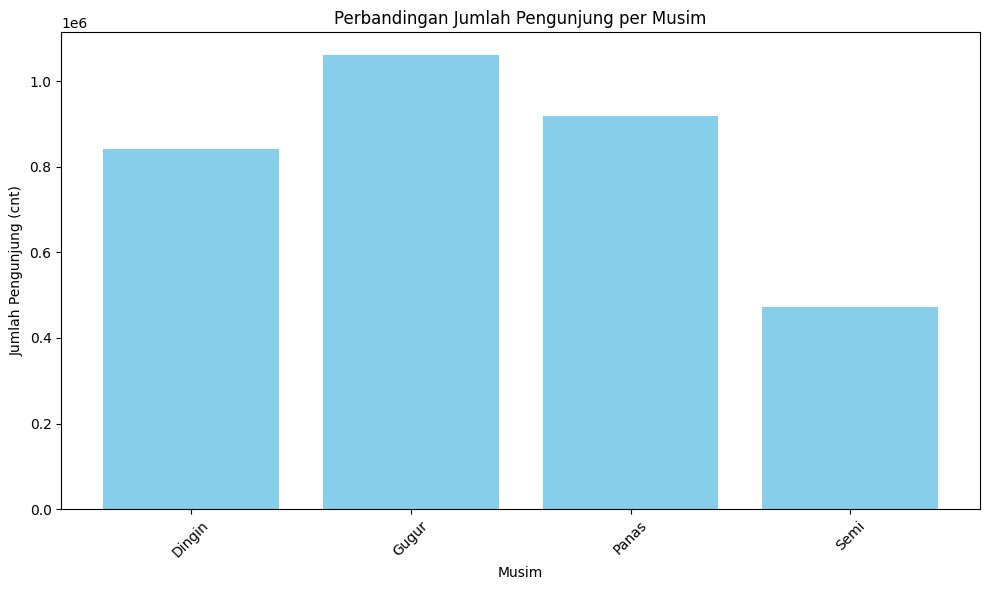

In [70]:
data = {'season': ['Dingin', 'Gugur', 'Panas', 'Semi'],
        'cnt': [841613, 1061129, 918589, 471348]}
df = pd.DataFrame(data)

# Membuat grafik batang
plt.figure(figsize=(10, 6))
plt.bar(df['season'], df['cnt'], color=['skyblue'])
plt.xlabel('Musim')
plt.ylabel('Jumlah Pengunjung (cnt)')
plt.title('Perbandingan Jumlah Pengunjung per Musim')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analisis Lanjutan (Opsional)

  **Melakukan Analisis Tren Peminjaman Sepeda berdasarkan Hari**

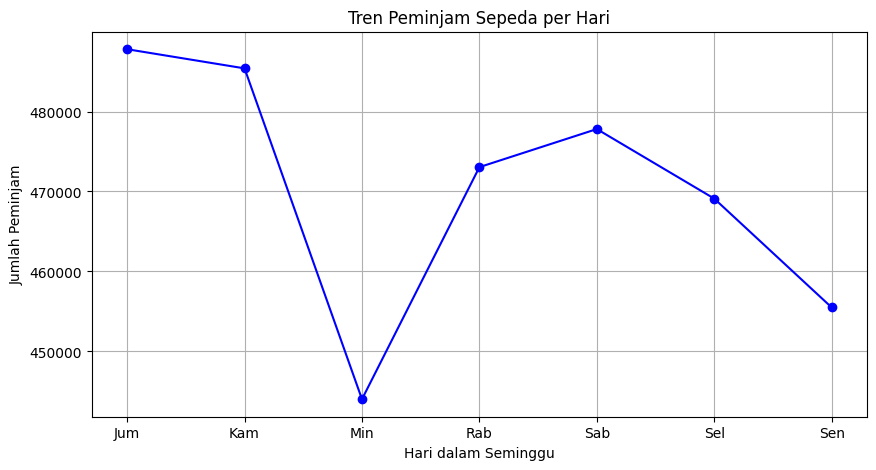

<ipython-input-71-ca52033f0f1d>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time_group', y='cnt', data=time_group_df, palette=custom_colors)
<ipython-input-71-ca52033f0f1d>:42: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='time_group', y='cnt', data=time_group_df, palette=custom_colors)


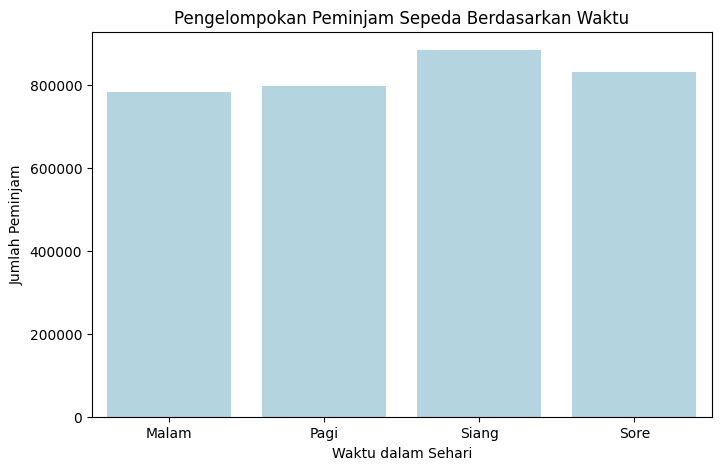

In [71]:
# Load Data
all_df = pd.read_csv("/content/drive/MyDrive/dataset/all_data.csv")
all_df['dteday'] = pd.to_datetime(all_df['dteday'])
all_df['weekday'] = all_df['dteday'].dt.weekday

# Mapping weekday names
weekday_labels = ['Sen', 'Sel', 'Rab', 'Kam', 'Jum', 'Sab', 'Min']
all_df['weekday_label'] = all_df['weekday'].map(lambda x: weekday_labels[x])

# Group by weekday
day_df = all_df.groupby('weekday_label').agg({'cnt': 'sum'}).reset_index()

# Plot Line Chart
plt.figure(figsize=(10, 5))
plt.plot(day_df['weekday_label'], day_df['cnt'], marker='o', linestyle='-', color='blue')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Peminjam')
plt.title('Tren Peminjam Sepeda per Hari')
plt.grid()
plt.show()

# Clustering (Manual Grouping based on Time of Day)
def time_of_day(hour):
    if 0 <= hour < 6:
        return 'Malam'
    elif 6 <= hour < 12:
        return 'Pagi'
    elif 12 <= hour < 18:
        return 'Siang'
    else:
        return 'Sore'

all_df['hour'] = np.random.randint(0, 24, size=len(all_df))  # Simulated hour data
all_df['time_group'] = all_df['hour'].apply(time_of_day)

# Grouping based on time_of_day
time_group_df = all_df.groupby('time_group').agg({'cnt': 'sum'}).reset_index()

# Plot Bar Chart for Clustering
plt.figure(figsize=(8, 5))
custom_colors = ['lightblue']
sns.barplot(x='time_group', y='cnt', data=time_group_df, palette=custom_colors)
plt.xlabel('Waktu dalam Sehari')
plt.ylabel('Jumlah Peminjam')
plt.title('Pengelompokan Peminjam Sepeda Berdasarkan Waktu')
plt.show()

**Insight:**
1. Tren Peminjam Sepeda per Hari

  * Jika jumlah peminjam lebih tinggi pada hari kerja (Senin–Jumat), ini menunjukkan bahwa sepeda banyak digunakan sebagai moda transportasi harian oleh pekerja atau mahasiswa.
  * Jika peminjaman meningkat pada akhir pekan (Sabtu & Minggu), kemungkinan besar sepeda lebih sering digunakan untuk rekreasi atau aktivitas santai.
  * Polanya penting untuk mengetahui kapan peak usage terjadi agar layanan bike sharing dapat dioptimalkan, misalnya dengan menambah jumlah sepeda di jam sibuk.

2. Pengelompokan Peminjam Berdasarkan Waktu (Clustering Manual)

  * Pembagian waktu penggunaan ke dalam Pagi, Siang, Sore, dan Malam memberikan gambaran kapan pengguna lebih aktif:
  * Pagi (06:00–11:59) → Kemungkinan besar digunakan untuk perjalanan ke kantor/sekolah.
  * Siang (12:00–17:59) → Bisa menunjukkan penggunaan untuk perjalanan santai atau kegiatan siang hari.
  * Sore (18:00–23:59) → Bisa jadi waktu pulang kerja atau rekreasi sore.
  * Malam (00:00–05:59) → Jika ada penggunaan tinggi di malam hari, mungkin dipakai untuk aktivitas tertentu seperti shift malam atau olahraga larut malam.

3. Potensi Optimalisasi Layanan

  * Jika peminjaman lebih banyak terjadi di jam tertentu, layanan bisa disesuaikan seperti:
  * Menambah jumlah sepeda di lokasi strategis pada jam sibuk.
  * Meningkatkan maintenance pada jam-jam penggunaan rendah agar sepeda selalu dalam kondisi optimal.
  * Menyediakan promo atau diskon di jam-jam kurang populer untuk meratakan penggunaan sepanjang hari.
  * Dari hasil ini, kamu bisa melakukan analisis lebih lanjut, misalnya melihat apakah faktor cuaca atau musim memengaruhi jumlah peminjam di waktu-waktu tertentu. 🚴‍♂️📊



**Conclution**
- Conclution pertanyaan 1

  Perbandingan Jumlah Peminjam untuk Setiap Hari Dari visualisasi jumlah peminjam berdasarkan hari dalam seminggu, kita dapat melihat bahwa:
  * Akhir pekan (Sabtu & Minggu) memiliki jumlah peminjam yang lebih tinggi dibandingkan dengan hari kerja.
  * Hal ini mengindikasikan bahwa kebanyakan orang lebih banyak menggunakan sepeda untuk rekreasi pada hari libur daripada sebagai alat transportasi sehari-hari.
  * Hari kerja (Senin - Jumat) memiliki jumlah peminjam yang relatif stabil, tetapi sedikit lebih rendah dibandingkan akhir pekan.
  
  Kesimpulan: Mayoritas peminjaman sepeda terjadi saat akhir pekan, kemungkinan karena digunakan untuk aktivitas rekreasi.

- Conclution pertanyaan 2

  Perbandingan Jumlah Peminjam Berdasarkan Kondisi Cuaca Dari hasil analisis terhadap kondisi cuaca:

  * Jumlah peminjaman tertinggi terjadi saat cuaca cerah karena kondisi ini ideal untuk bersepeda.
  * Cuaca berkabut masih memiliki jumlah peminjaman yang cukup tinggi, meskipun sedikit lebih rendah dibandingkan cuaca cerah.
  * Peminjaman berkurang signifikan saat hujan ringan, menunjukkan bahwa pengguna cenderung menghindari bersepeda dalam kondisi basah.
  * Hujan lebat memiliki jumlah peminjaman terendah, yang masuk akal karena hujan deras mengurangi kenyamanan dan keamanan saat bersepeda.

  Kesimpulan: Cuaca sangat berpengaruh terhadap peminjaman sepeda, dengan cuaca cerah sebagai kondisi terbaik untuk bersepeda.
- Conclution pertanyaan 3

  Perbandingan Jumlah Pengunjung untuk Setiap Musim Dari analisis jumlah peminjaman sepeda berdasarkan musim:

  * Musim gugur memiliki jumlah peminjam tertinggi, kemungkinan karena suhu yang nyaman dan kondisi cuaca yang lebih stabil.
  * Musim panas juga memiliki jumlah peminjam yang tinggi, meskipun sedikit lebih rendah dibandingkan musim gugur.
  * Musim dingin mengalami penurunan jumlah peminjaman, yang mungkin disebabkan oleh suhu yang lebih rendah dan kondisi jalan yang lebih licin.
  * Musim semi memiliki jumlah peminjaman terendah, kemungkinan karena cuaca yang masih tidak menentu setelah musim dingin.
  
  Kesimpulan: Musim gugur dan musim panas adalah waktu paling populer untuk bersepeda, sedangkan musim dingin dan musim semi mengalami penurunan jumlah peminjaman.

In [72]:
#Baca dataset dari Google Drive
file_path = '/content/drive/My Drive/dataset/day.csv'
all_df = pd.read_csv(file_path)

output_path = '/content/drive/My Drive/dataset/all_data.csv'
all_df.to_csv(output_path, index=False)

print("Dataset berhasil disimpan ke Google Drive.")


Dataset berhasil disimpan ke Google Drive.
